In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('Bias_correction_ucl.csv')
df 

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [6]:
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [7]:
df=df.dropna()   # drop missing values

In [8]:
df.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


In [10]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


# Feature Engineering

In [11]:
df["Day"] = pd.to_datetime(df["Date"], format = '%Y/%m/%d').dt.day       #finding day of the month
df["Month"] = pd.to_datetime(df["Date"], format = '%Y/%m/%d').dt.month # finding month of the year
df["Year"] = pd.to_datetime(df["Date"], format = '%Y/%m/%d').dt.year  # Finding the year
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017


In [12]:
df=df.drop('Date',axis=1) 
df                                    # dropping the column as the day, month and year is already extracted from Date

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017


# Exploratory Data Analysis

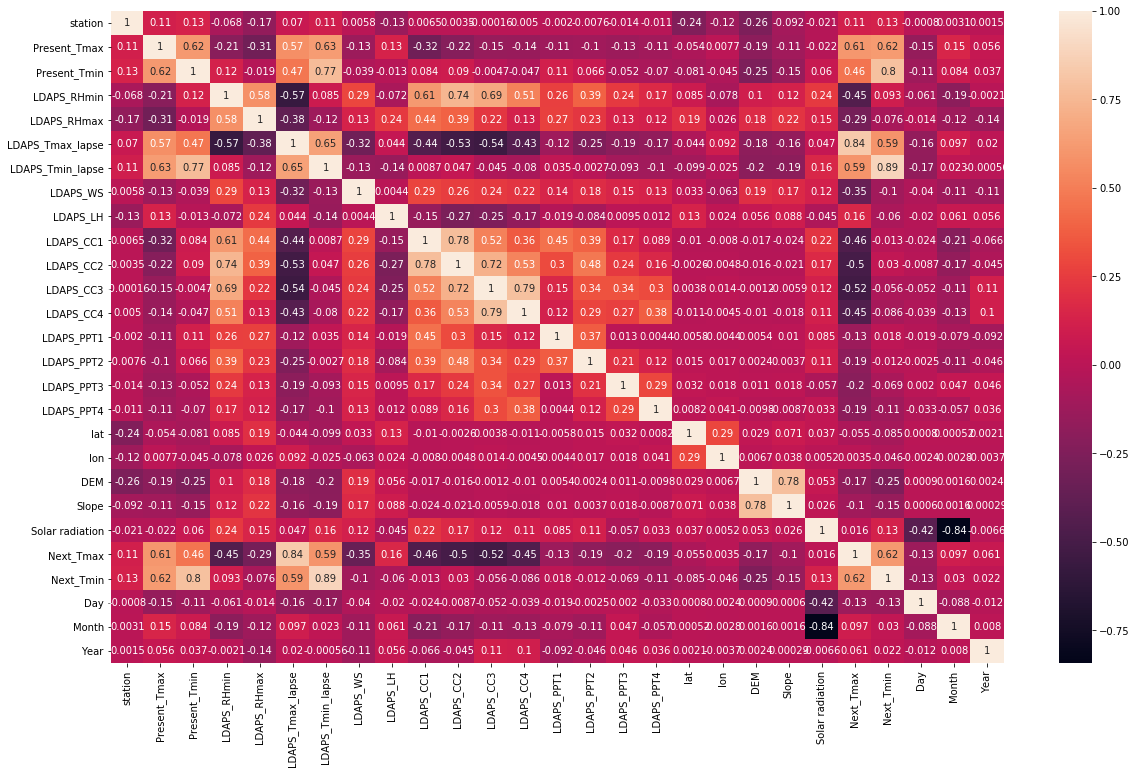

In [23]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)  

# Bivariate analysis of Input Variables with respect to 'Next_TMin & Next_TMax'(Both the Target variables)

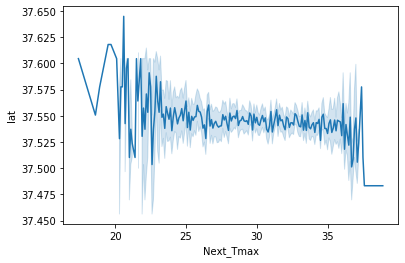

In [26]:
sns.lineplot(x='Next_Tmax', y='lat', data=df)      #   Latitude is having a constant effect on next day maximum temperature

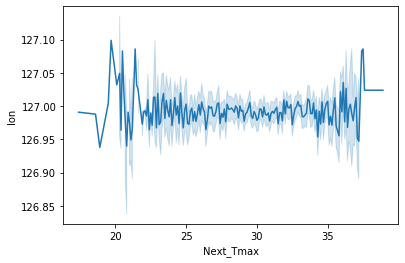

In [28]:
sns.lineplot(x='Next_Tmax', y='lon', data=df)        # Longitude is having a constant effect on next day maximum temperature

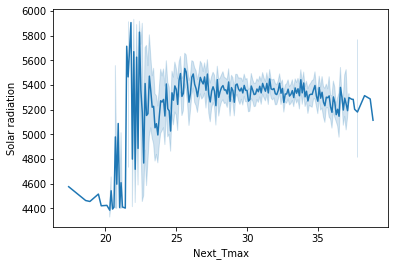

In [29]:
sns.lineplot(x='Next_Tmax', y='Solar radiation', data=df)  # Solar radiation has increasing effect then having stable effect on next day maximum temperature

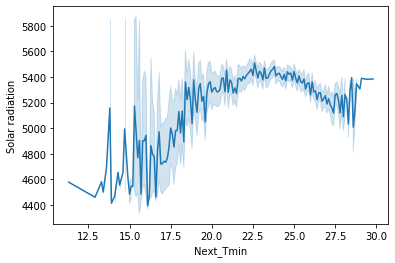

In [30]:
sns.lineplot(x='Next_Tmin', y='Solar radiation', data=df) # Solar radiation has increasing effect on next day minimum temperature

# EDA - Conclusions

1. Next_Tmax and Next_Tmin both the target variables are having a strong positive correlation

2. Solar radiation is affecting Next_Tmin temperature more than Next_Tmax temperature

3. LDAPS_CC1, LDAPS_CC2, LDAPSCC3, LDAPSCC4 are having negative correlation with Next_Tmax temperature

4. Increase in DEM(Elevation above sea level) & Slope decreases the Next_Tmin temperature 

5. Present_Tmax and Present_Tmin both are having positive correlation with Next_Tmin and Next_Tmax which means present day temperature is having very much impact on Next day temperature

# Splitting data into target and input variables

In [13]:
df_x=df.drop('Next_Tmax',axis=1) 
df_x.head()   

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,22.5,30,6,2013


In [14]:
y=pd.DataFrame(df.Next_Tmax)
y.head() 

,Next_Tmax
0,29.1
1,30.5
2,31.1
3,31.7
4,31.2


In [15]:
from sklearn.preprocessing import StandardScaler  # Applying Standard Scaler
sc = StandardScaler()
x = sc.fit_transform(df_x) 
x = pd.DataFrame(x,columns=df_x.columns) 
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Day,Month,Year
0,-1.664607,-0.353318,-0.748029,0.104660,0.382768,-0.525269,-0.215525,-0.126423,0.206603,-0.513123,...,-0.224971,1.186076,-0.005302,2.769091,1.111162,1.510565,-0.689265,1.578778,-2.773359,-1.411767
1,-1.526052,0.725138,-0.664721,-0.305052,0.311697,0.078334,0.223368,-0.644133,-0.313359,-0.545304,...,-0.224971,1.186076,0.512280,-0.315828,-0.543220,1.222997,-0.165513,1.578778,-2.773359,-1.411767
2,-1.387498,0.624033,0.043400,-0.549344,-0.609425,0.160080,0.449896,-0.439100,-1.244497,-0.606944,...,-0.224971,0.650626,0.840503,-0.526719,-0.723891,1.209602,0.398527,1.578778,-2.773359,-1.411767
3,-1.248943,0.758840,0.085054,0.103573,1.128335,0.028710,-0.079238,-0.663353,0.096026,-0.580143,...,-0.224971,1.987268,0.386040,-0.298272,0.928888,1.194265,0.559681,1.578778,-2.773359,-1.411767
4,-1.110389,0.556630,-0.539758,-0.037665,0.249244,-0.171981,-0.010803,-0.624327,1.349989,-0.827872,...,-0.224971,0.117159,1.812547,-0.494848,-0.549485,1.200286,-0.165513,1.578778,-2.773359,-1.411767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,1.106481,-2.240616,-2.247578,-2.190405,-1.402898,-0.614083,-2.223667,-0.225479,-1.569844,-1.203497,...,-0.224971,0.117159,0.613271,-0.655747,-0.500966,-2.065599,-2.099366,1.578778,1.010217,1.423537
7584,1.245036,-2.442826,-2.414195,-1.820788,-0.648815,-0.990460,-2.432415,-0.609132,0.583486,-1.151793,...,-0.224971,-0.686016,1.193973,-0.735482,-0.820711,-2.098689,-2.341098,1.578778,1.010217,1.423537
7585,1.383590,-2.173212,-2.539157,-2.050081,-1.318376,-1.110333,-2.021883,-0.434188,0.283984,-1.290699,...,-0.224971,-0.150566,-1.267697,-0.852919,-0.804538,-2.095175,-1.938212,1.578778,1.010217,1.423537
7586,1.522145,-2.173212,-2.289232,-2.234735,-1.537141,-0.886737,-2.039881,-0.253241,-0.452772,-1.268430,...,-0.224971,-0.418291,-1.040466,-0.821476,-0.755800,-2.106671,-1.656192,1.578778,1.010217,1.423537


In [16]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(0,101):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)   
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score: 
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state         

# Applying Machine Learning Algorithms to build the Models

In [18]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()                                            # Applying Linear Regression
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to  0 is 0.8170596601220624
r2 score corresponding to  1 is 0.8106778783113022
r2 score corresponding to  2 is 0.804791994901155
r2 score corresponding to  3 is 0.8215508289337601
r2 score corresponding to  4 is 0.7941621263089423
r2 score corresponding to  5 is 0.8175606252386125
r2 score corresponding to  6 is 0.7948451953088671
r2 score corresponding to  7 is 0.8078087033015695
r2 score corresponding to  8 is 0.8048123410997289
r2 score corresponding to  9 is 0.8071023517874947
r2 score corresponding to  10 is 0.8083832772471105
r2 score corresponding to  11 is 0.8031147643635976
r2 score corresponding to  12 is 0.7982296197304473
r2 score corresponding to  13 is 0.8000848079286937
r2 score corresponding to  14 is 0.8132103445019316
r2 score corresponding to  15 is 0.7809895734474204
r2 score corresponding to  16 is 0.8131276008400768
r2 score corresponding to  17 is 0.8083888051787642
r2 score corresponding to  18 is 0.8053762589192561
r2 score corresponding 

In [19]:
from xgboost import XGBRegressor 

In [20]:
xgbr=XGBRegressor()
r_state=maxr2_score(xgbr,x,y) 

r2 score corresponding to  0 is 0.9374389320199967
r2 score corresponding to  1 is 0.9340770424236055
r2 score corresponding to  2 is 0.9339161644721747
r2 score corresponding to  3 is 0.9344186784629488
r2 score corresponding to  4 is 0.930933121735726
r2 score corresponding to  5 is 0.9369221255614147
r2 score corresponding to  6 is 0.9290280744929128
r2 score corresponding to  7 is 0.9362882790798503
r2 score corresponding to  8 is 0.9344780868665316
r2 score corresponding to  9 is 0.9285919398106789
r2 score corresponding to  10 is 0.9347000278529936
r2 score corresponding to  11 is 0.9349319901275334
r2 score corresponding to  12 is 0.9333201454572689
r2 score corresponding to  13 is 0.9323805802081757
r2 score corresponding to  14 is 0.9371787176414574
r2 score corresponding to  15 is 0.9255837877865484
r2 score corresponding to  16 is 0.9344308783724198
r2 score corresponding to  17 is 0.936239924290051
r2 score corresponding to  18 is 0.9320513986410665
r2 score corresponding t

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,11)}
knr=KNeighborsRegressor() 
gknr = GridSearchCV(knr, neighbors, cv=5)
gknr.fit(x,y) 
gknr.best_params_

{'n_neighbors': 10}

In [26]:
knr=KNeighborsRegressor(n_neighbors=4) 
r_state=maxr2_score(knr,x,y) 

r2 score corresponding to  0 is 0.8936157944527389
r2 score corresponding to  1 is 0.8907021798816421
r2 score corresponding to  2 is 0.8864188048234852
r2 score corresponding to  3 is 0.8855954318036411
r2 score corresponding to  4 is 0.8747967844834745
r2 score corresponding to  5 is 0.8907719880133645
r2 score corresponding to  6 is 0.8802452526627016
r2 score corresponding to  7 is 0.8944337139102563
r2 score corresponding to  8 is 0.8829046369584357
r2 score corresponding to  9 is 0.8737367021635115
r2 score corresponding to  10 is 0.8817555496967238
r2 score corresponding to  11 is 0.8804604312929167
r2 score corresponding to  12 is 0.8801435361527696
r2 score corresponding to  13 is 0.8799515480699329
r2 score corresponding to  14 is 0.8916396693812105
r2 score corresponding to  15 is 0.8760593535945068
r2 score corresponding to  16 is 0.8880895972159183
r2 score corresponding to  17 is 0.8882115803439865
r2 score corresponding to  18 is 0.883002877109018
r2 score corresponding 

In [27]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
g_lsreg = GridSearchCV(lsreg, parameters, cv=5)
g_lsreg.fit(x,y)
g_lsreg.best_params_

{'alpha': 0.1}

In [29]:
lsreg=Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to  0 is 0.8140690205685882
r2 score corresponding to  1 is 0.8100652451453967
r2 score corresponding to  2 is 0.8020385741267771
r2 score corresponding to  3 is 0.8205127267361054
r2 score corresponding to  4 is 0.7894399344275626
r2 score corresponding to  5 is 0.8152971644768151
r2 score corresponding to  6 is 0.7941492407932687
r2 score corresponding to  7 is 0.8078855545889579
r2 score corresponding to  8 is 0.80179520571531
r2 score corresponding to  9 is 0.803452208754224
r2 score corresponding to  10 is 0.806081747332941
r2 score corresponding to  11 is 0.8022392848562478
r2 score corresponding to  12 is 0.7946032240925825
r2 score corresponding to  13 is 0.7966470005357326
r2 score corresponding to  14 is 0.813263640866139
r2 score corresponding to  15 is 0.7795065241640433
r2 score corresponding to  16 is 0.8111229997462889
r2 score corresponding to  17 is 0.8040761384735302
r2 score corresponding to  18 is 0.8021940128073096
r2 score corresponding to  

In [30]:
from sklearn.linear_model import Ridge
rireg=Ridge()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
g_rireg = GridSearchCV(rireg, parameters, cv=5)
g_rireg.fit(x,y)
g_rireg.best_params_

{'alpha': 1}

In [32]:
rireg=Ridge(alpha=0.001)
r_state=maxr2_score(rireg,x,y) 

r2 score corresponding to  0 is 0.8170596694918981
r2 score corresponding to  1 is 0.8106779116629378
r2 score corresponding to  2 is 0.8047920004631858
r2 score corresponding to  3 is 0.8215508652884396
r2 score corresponding to  4 is 0.794162082826248
r2 score corresponding to  5 is 0.8175606295241811
r2 score corresponding to  6 is 0.7948452392931196
r2 score corresponding to  7 is 0.807808752818396
r2 score corresponding to  8 is 0.8048123353998944
r2 score corresponding to  9 is 0.8071023432060245
r2 score corresponding to  10 is 0.8083832751408191
r2 score corresponding to  11 is 0.803114793858009
r2 score corresponding to  12 is 0.7982295973378803
r2 score corresponding to  13 is 0.8000847987898076
r2 score corresponding to  14 is 0.8132103973053451
r2 score corresponding to  15 is 0.7809895973895832
r2 score corresponding to  16 is 0.8131276139823691
r2 score corresponding to  17 is 0.8083887799408106
r2 score corresponding to  18 is 0.8053762642619129
r2 score corresponding to

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
enr=ElasticNet()
parameters={"alpha":[0.001,0.01,0.1,1]} 
g_enr = GridSearchCV(enr, parameters, cv=5)
g_enr.fit(x,y)
g_enr.best_params_

{'alpha': 0.1}

In [34]:
enr=ElasticNet(alpha=0.1)
r_state=maxr2_score(enr,x,y) 

r2 score corresponding to  0 is 0.8012979577183714
r2 score corresponding to  1 is 0.8001409963287107
r2 score corresponding to  2 is 0.7901001372543407
r2 score corresponding to  3 is 0.8116696049711842
r2 score corresponding to  4 is 0.7776821815247726
r2 score corresponding to  5 is 0.8044409232667211
r2 score corresponding to  6 is 0.7835538642425954
r2 score corresponding to  7 is 0.8003507133469665
r2 score corresponding to  8 is 0.7915700432013663
r2 score corresponding to  9 is 0.7930946949979881
r2 score corresponding to  10 is 0.7969271338013207
r2 score corresponding to  11 is 0.7927041397738871
r2 score corresponding to  12 is 0.7858310026791335
r2 score corresponding to  13 is 0.7839762578663861
r2 score corresponding to  14 is 0.8033029501951593
r2 score corresponding to  15 is 0.7709095521421269
r2 score corresponding to  16 is 0.8005104150541813
r2 score corresponding to  17 is 0.7931343913382378
r2 score corresponding to  18 is 0.7903102367815683
r2 score corresponding

In [36]:
from sklearn import svm
from sklearn.svm import SVR
svr= svm.SVR()
svr=SVR()
svr=SVR(kernel='linear',C=1.0)
r_state=maxr2_score(svr,x,y)          

r2 score corresponding to  0 is 0.8142674064536278
r2 score corresponding to  1 is 0.8115365561522763
r2 score corresponding to  2 is 0.8025783116336025
r2 score corresponding to  3 is 0.8202455144786028
r2 score corresponding to  4 is 0.7912116791267103
r2 score corresponding to  5 is 0.8175019364938718
r2 score corresponding to  6 is 0.7953216257303446
r2 score corresponding to  7 is 0.808875051103801
r2 score corresponding to  8 is 0.8040783505578131
r2 score corresponding to  9 is 0.8049802707498465
r2 score corresponding to  10 is 0.8061003352105213
r2 score corresponding to  11 is 0.8033649198457528
r2 score corresponding to  12 is 0.7959618448045591
r2 score corresponding to  13 is 0.7977448890442927
r2 score corresponding to  14 is 0.8122646040550676
r2 score corresponding to  15 is 0.7781289971265771
r2 score corresponding to  16 is 0.8116258374329977
r2 score corresponding to  17 is 0.8055428160820668
r2 score corresponding to  18 is 0.8050597882844522
r2 score corresponding 

In [37]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()
dtr=DecisionTreeRegressor(criterion='mae',random_state=0,splitter='random') 
r_state=maxr2_score(dtr,x,y)   

r2 score corresponding to  0 is 0.7974324342185692
r2 score corresponding to  1 is 0.802778567596794
r2 score corresponding to  2 is 0.783890675045695
r2 score corresponding to  3 is 0.8108657358907634
r2 score corresponding to  4 is 0.7926185559747516
r2 score corresponding to  5 is 0.7869327789499461
r2 score corresponding to  6 is 0.7896646354659029
r2 score corresponding to  7 is 0.770111565640806
r2 score corresponding to  8 is 0.7854017695271808
r2 score corresponding to  9 is 0.7649617249160158
r2 score corresponding to  10 is 0.7932349528898538
r2 score corresponding to  11 is 0.7769561052236333
r2 score corresponding to  12 is 0.7741029839852022
r2 score corresponding to  13 is 0.7877177813106905
r2 score corresponding to  14 is 0.8170866931778628
r2 score corresponding to  15 is 0.7748784037502484
r2 score corresponding to  16 is 0.7929255553942096
r2 score corresponding to  17 is 0.7939451447176041
r2 score corresponding to  18 is 0.7965945296548054
r2 score corresponding to

In [40]:
from sklearn import ensemble
from sklearn.ensemble import AdaBoostRegressor
ada_reg= AdaBoostRegressor()
ada_reg=AdaBoostRegressor(learning_rate=1,n_estimators=60,base_estimator=enr) 
r_state=maxr2_score(ada_reg,x,y) 

r2 score corresponding to  0 is 0.8039772149386881
r2 score corresponding to  1 is 0.7950318392098512
r2 score corresponding to  2 is 0.7909514335191108
r2 score corresponding to  3 is 0.8083870425073107
r2 score corresponding to  4 is 0.7805357670884316
r2 score corresponding to  5 is 0.8022191555753506
r2 score corresponding to  6 is 0.7852530533994777
r2 score corresponding to  7 is 0.7901687363813732
r2 score corresponding to  8 is 0.7891089197571811
r2 score corresponding to  9 is 0.7905281936931174
r2 score corresponding to  10 is 0.7971981213821727
r2 score corresponding to  11 is 0.789246905007176
r2 score corresponding to  12 is 0.7851328367001538
r2 score corresponding to  13 is 0.7883933129742522
r2 score corresponding to  14 is 0.7944550214899763
r2 score corresponding to  15 is 0.763832786579034
r2 score corresponding to  16 is 0.8003472863278337
r2 score corresponding to  17 is 0.7927212998062628
r2 score corresponding to  18 is 0.7896439928000726
r2 score corresponding t

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=60) 
r_state=maxr2_score(gbr,x,y) 

r2 score corresponding to  0 is 0.8563410754270537
r2 score corresponding to  1 is 0.847216597607501
r2 score corresponding to  2 is 0.8497279509646446
r2 score corresponding to  3 is 0.8533092112822165
r2 score corresponding to  4 is 0.8399803927093985
r2 score corresponding to  5 is 0.853463674153894
r2 score corresponding to  6 is 0.8403431221813625
r2 score corresponding to  7 is 0.8564893704971277
r2 score corresponding to  8 is 0.8474334022947748
r2 score corresponding to  9 is 0.8391187671157305
r2 score corresponding to  10 is 0.8540850923223091
r2 score corresponding to  11 is 0.8477055615358698
r2 score corresponding to  12 is 0.8393591226919773
r2 score corresponding to  13 is 0.8421767881049034
r2 score corresponding to  14 is 0.8584720527627361
r2 score corresponding to  15 is 0.827517325193085
r2 score corresponding to  16 is 0.8589898935853035
r2 score corresponding to  17 is 0.85084829654457
r2 score corresponding to  18 is 0.8475295796280763
r2 score corresponding to  

In [21]:
## Here XGBoostRegressor is working best with r2_score of 0.9431411491818298
import joblib
joblib.dump(xgbr, 'xgbr_Temperature_dataset.pkl')

['xgbr_Temperature_dataset.pkl']